In [51]:
import pandas as pd
from urllib.request import urlopen

import requests
from io import BytesIO

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

from scipy import stats
import math

import numpy as np
from statsbombpy import sb

In [30]:
df = pd.read_csv("dataset - 2020-09-24.csv")
df.sample(3)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
171,Brandon Pierrick,40.0,Crystal-Palace,Forward,England,18.0,2,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0
13,Mesut Özil,10.0,Arsenal,Midfielder,Germany,31.0,184,100,39,33,...,NaN,NaN,NaN,NaN,NaN,NaN,13,0,95,83.0
94,Matthew Lowton,2.0,Burnley,Defender,England,31.0,172,49,83,2,...,NaN,NaN,NaN,NaN,NaN,NaN,35,0,144,1.0


In [31]:
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [32]:
df = df[['Name','Position','Appearances','Goals','Shots on target','Passes', 'Passes per match','Offsides','Big chances created', 'Crosses']]

In [33]:
df.describe()

,Appearances,Goals,Shots on target,Passes,Passes per match,Offsides,Big chances created,Crosses
count,571.000000,571.000000,309.000000,571.000000,571.000000,502.000000,502.000000,502.000000
mean,68.823117,7.327496,36.915858,2309.704028,25.895989,11.063745,8.171315,121.920319
std,81.797516,16.810490,57.506911,3127.226566,18.566906,26.570058,13.386715,244.916813
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,1.000000,92.000000,11.255000,0.000000,0.000000,2.000000
50%,36.000000,1.000000,12.000000,1000.000000,25.010000,2.000000,3.000000,20.500000
75%,108.000000,6.000000,47.000000,3285.000000,37.970000,8.750000,9.000000,107.750000
max,539.000000,180.000000,411.000000,17932.000000,98.500000,203.000000,97.000000,2247.000000


In [34]:
df.columns

Index(['Name', 'Position', 'Appearances', 'Goals', 'Shots on target', 'Passes',
       'Passes per match', 'Offsides', 'Big chances created', 'Crosses'],
      dtype='object')

In [35]:
df.drop('Passes per match', inplace= True, axis= 1)
df.columns

Index(['Name', 'Position', 'Appearances', 'Goals', 'Shots on target', 'Passes',
       'Offsides', 'Big chances created', 'Crosses'],
      dtype='object')

In [36]:
lista = list(df.columns)
del lista[0:3]
lista



['Goals',
 'Shots on target',
 'Passes',
 'Offsides',
 'Big chances created',
 'Crosses']

In [37]:
df['Goles x partido'] = df['Goals']/df['Appearances']
df['Tiros x partido'] = df['Shots on target']/df['Appearances']
df['Pases x partido'] = df['Passes']/df['Appearances']
df['Offsides x partido'] = df['Offsides']/df['Appearances']
df['Big chances created x partido'] = df['Big chances created']/df['Appearances']
df['centros x partido'] = df['Crosses']/df['Appearances']

In [38]:
df.sample(4)

,Name,Position,Appearances,Goals,Shots on target,Passes,Offsides,Big chances created,Crosses,Goles x partido,Tiros x partido,Pases x partido,Offsides x partido,Big chances created x partido,centros x partido
315,Takumi Minamino,Forward,11,0,2.0,107,0.0,0.0,2.0,0.000000,0.181818,9.727273,0.000000,0.000000,0.181818
231,Luke Ayling,Defender,2,0,NaN,108,0.0,0.0,3.0,0.000000,NaN,54.000000,0.000000,0.000000,1.500000
353,Phil Jones,Defender,200,2,NaN,7835,3.0,11.0,137.0,0.010000,NaN,39.175000,0.015000,0.055000,0.685000
42,Tyrone Mings,Defender,51,2,NaN,1961,2.0,2.0,10.0,0.039216,NaN,38.450980,0.039216,0.039216,0.196078


In [39]:
for columna in lista:
    df.drop(columna, inplace= True, axis= 1)

df.sample(4)

,Name,Position,Appearances,Goles x partido,Tiros x partido,Pases x partido,Offsides x partido,Big chances created x partido,centros x partido
467,Juan Foyth,Defender,16,0.0625,NaN,40.125000,0.0,0.125,0.125000
279,Nampalys Mendy,Midfielder,44,0.0000,0.022727,35.431818,0.0,0.000,0.136364
348,Lee Grant,Goalkeeper,31,0.0000,NaN,30.935484,NaN,NaN,NaN
102,Bobby Thomas,Defender,0,NaN,NaN,NaN,NaN,NaN,NaN


#### Habiendo obtenido las columnas que quería evaluar, paso a filtrar para evaluar sólo los jugadores que son delanteros y complen estar en el percentil 40 o superior en cuanto a appearances para evitar los outliers debido a pocas apariciones

In [40]:
# Obtengo el percentil 40 de Appearances
percentil40_Appearances = stats.scoreatpercentile(a = df.Appearances, per = 40, axis= None)
percentil40_Appearances

25.0

In [41]:
delanteros = df[(df['Appearances'] >= percentil40_Appearances)&(df['Position'] == 'Forward')].reset_index(drop = True)
delanteros.shape

(76, 9)

In [42]:
params = list(delanteros.columns[3:])
aguero = list(delanteros[delanteros['Name'] == 'Sergio Agüero'].iloc[0].values[3:])

In [43]:
len(params)

6

#### Obtengo un array con los percentiles de Aguero para cada una de las estadísticas

In [44]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(delanteros[params[x]], aguero[x])))

values

[100, 97, 82, 94, 86, 48]

#### Copio el código desde la librería Mpl Soccer

In [45]:
len(params)

6

In [56]:
# Open an image from the Internet
def open_image_internet(url_adress):
    response = requests.get(url_adress) # Send http request to the url adress
    
    # Make sure everything went right
    if response.status_code == 200:
        image_bytes = BytesIO(response.content) # Get content 
        image = Image.open(image_bytes) # Open the image
        return image # Output
    else:
        print("Failed to download image:", response.status_code)

# Open image from the Internet
image_internet = open_image_internet('https://banner2.cleanpng.com/20180819/tjz/kisspng-sergio-agero-fifa-18-manchester-city-f-c-argent-fut-champions-monthly-rewards-for-futwiz-5b797d59bfd806.5955745115346886017858.jpg')

In [63]:
def open_image_local(path_to_image):
    image = Image.open(path_to_image) # Open the image
    image_array = np.array(image) # Convert to a numpy array
    return image_array # Output

# Open the image from my computer
image_local = open_image_local(r'C:\Users\Usuario\Desktop\Fulbo analisis\aguero_png-circ.png')

In [65]:
URL3 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-Medium.ttf?raw=true'
catamaran2 = FontManager(URL3)
URL = 'https://github.com/google/fonts/blob/main/ofl/fjallaone/FjallaOne-Regular.ttf?raw=true'
robotto_regular = FontManager(URL)
URL2 = 'https://github.com/VanillaandCream/Catamaran-Tamil/blob/master/Fonts/Catamaran-ExtraBold.ttf?raw=true'
catamaran = FontManager(URL2)

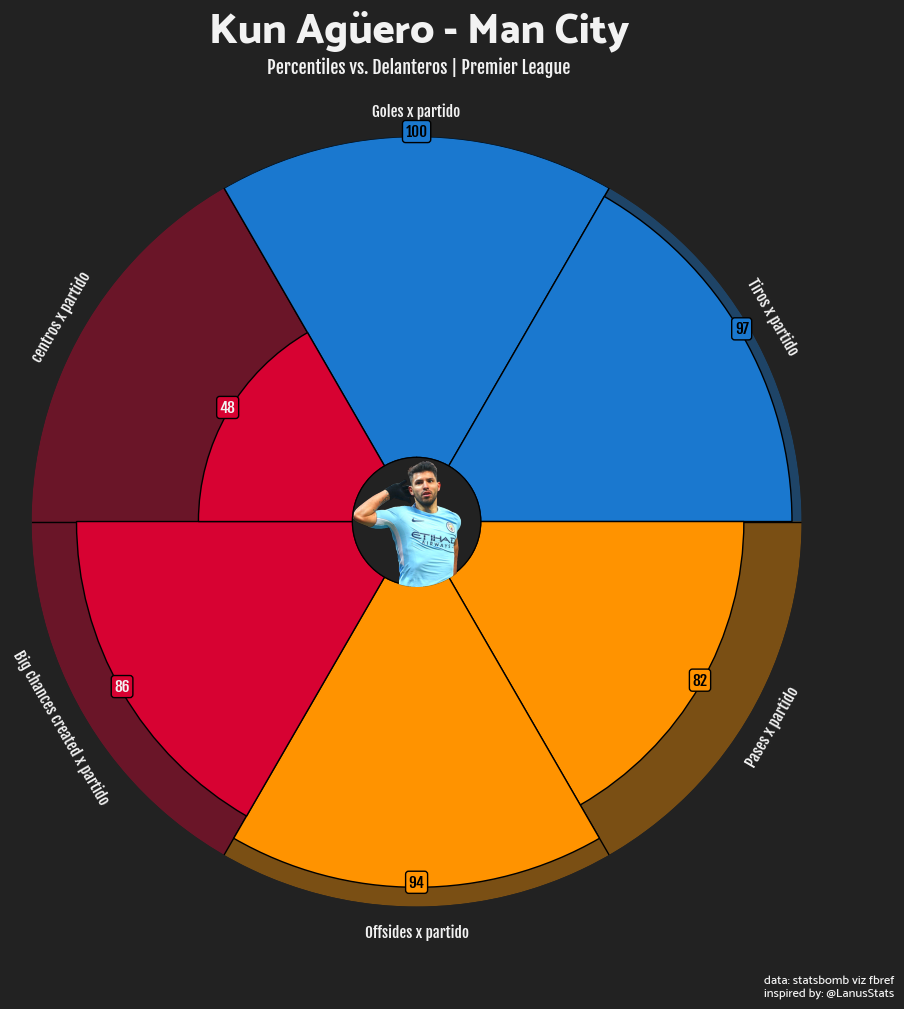

In [86]:

# color for the slices and text
slice_colors = ["#1A78CF"] * 2 + ["#FF9300"] * 2 + ["#D70232"] * 2
text_colors = ["#000000"] * 4 + ["#F2F2F2"] * 2


# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#222222",     # background color
    straight_line_color="#000000",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_color= '#000000',
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#000000", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=robotto_regular.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#F2F2F2", fontsize=11,
        fontproperties=robotto_regular.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Kun Agüero - Man City", size=30,
    ha="center", fontproperties=catamaran.prop, color="#F2F2F2"
)

# add subtitle
fig.text(
    0.515, 0.943,
    "Percentiles vs. Delanteros | Premier League",
    size=13,
    ha="center", fontproperties=robotto_regular.prop, color="#F2F2F2"
)

#add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @LanusStats"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=catamaran2.prop, color="#F2F2F2",
    ha="right"
)

# add text
# fig.text(
#     0.34, 0.925, "Generales         Pases                Defensiva         Ataque", size=14,
#     fontproperties=robotto_regular.prop, color="#F2F2F2"
# )

# add rectangles
# fig.patches.extend([
#     plt.Rectangle(
#         (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
#         transform=fig.transFigure, figure=fig
#     ),
#     plt.Rectangle(
#         (0.42, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
#         transform=fig.transFigure, figure=fig
#     ),
#     plt.Rectangle(
#         (0.53, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
#         transform=fig.transFigure, figure=fig
#     ),
#     plt.Rectangle(
#         (0.64, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
#         transform=fig.transFigure, figure=fig
#     ),
# ])

# add image
ax_image = add_image(
    image_local, fig, left=0.4478, bottom=0.43, width=0.13, height=0.127
)   # these values might differ when you are plotting

fig.savefig("Radar Percentiles_Sergio Agüero", dpi = 300)